In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Условие 1: 
### Задача 1
Постройте график <br>
Назовите график <br>
Сделайте именование оси x и оси y <br>
Сделайте выводы

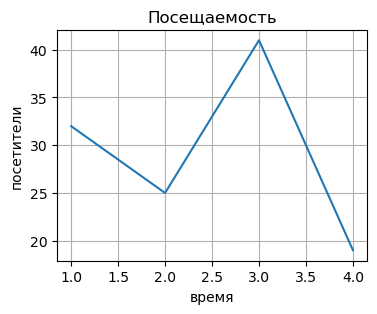

In [6]:
plt.figure(figsize=(4, 3))
plt.plot([1, 2, 3, 4], [32, 25, 41, 19])
plt.xlabel('время')
plt.ylabel('посетители')
plt.title('Посещаемость')
plt.grid();

Наибольшая посещаемость приходится на 3 часа.

### 1.1. Скачать данные в закрепе к уроку (данные по недвижимости)

In [7]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

Text(0, 0.5, 'Количество домов')

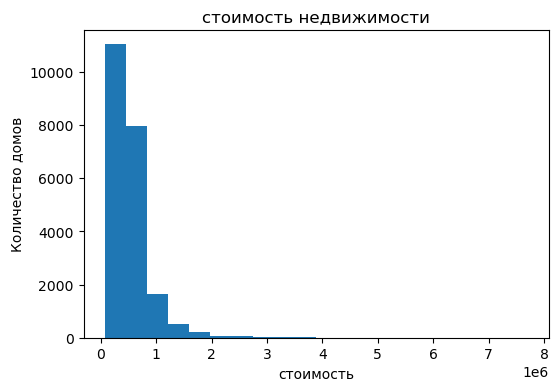

In [8]:
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=20)
plt.title('стоимость недвижимости')
plt.xlabel('стоимость')
plt.ylabel('Количество домов')

Количество домов обратно пропорционально их стоимости.

### 1.3 Изучите распределение квадратуры жилой

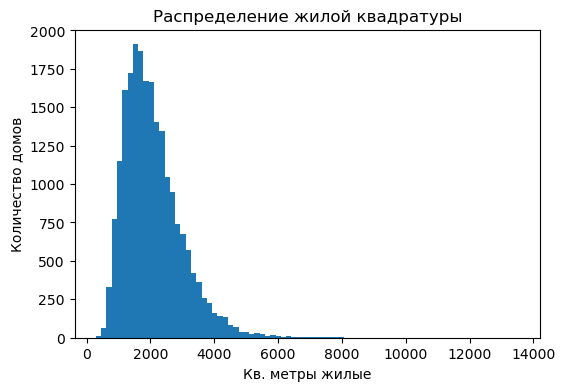

In [13]:
plt.figure(figsize=(6, 4))
plt.hist(df['sqft_living'], bins=80)
plt.title('Распределение жилой квадратуры')
plt.xlabel('Кв. метры жилые')
plt.ylabel('Количество домов');

Средняя жилая площадь около 2000 кв.м.

### 1.4 Изучите распределение года постройки

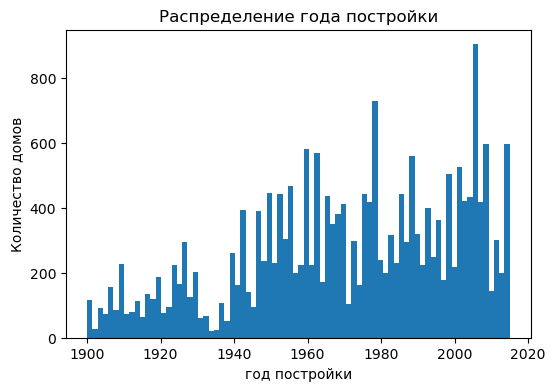

In [15]:
plt.figure(figsize=(6, 4))
plt.hist(df['yr_built'], bins=80)
plt.title('Распределение года постройки')
plt.xlabel('год постройки')
plt.ylabel('Количество домов');

Наиболее активно застройка велась после 2000 года.

## Условие 2: 
### 2 задача
### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график

Сделайте выводы

In [34]:
waterfront=df['waterfront'].value_counts()
waterfront.head()

0    21450
1      163
Name: waterfront, dtype: int64

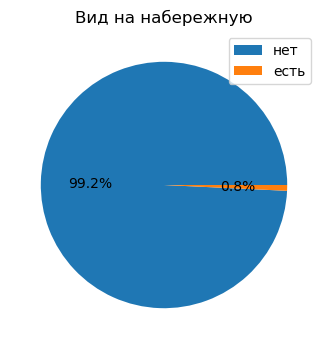

In [35]:
plt.figure(figsize=(10, 4))
plt.pie(waterfront.values, autopct='%1.1f%%')
plt.title('Вид на набережную')
plt.legend(['нет', 'есть']);

Домов с видом на набережную менее 1%.

### 2.2 Изучите распределение этажей домов

In [23]:
floors=df['floors'].value_counts()
floors.head()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
Name: floors, dtype: int64

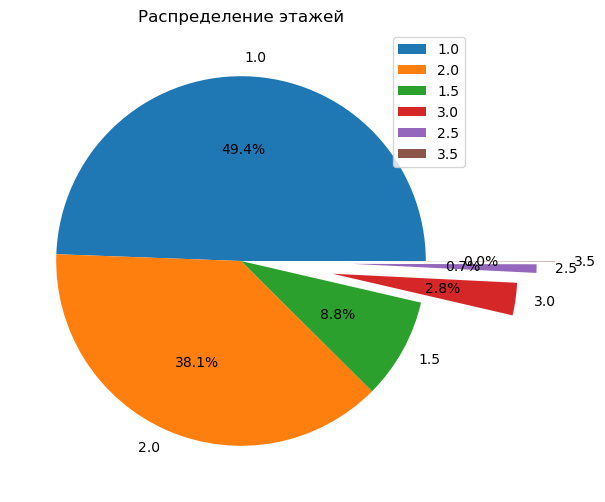

In [46]:
plt.figure(figsize=(6, 6))
expl = [0, 0, 0, 0.5, 0.6, 0.7]
plt.pie(floors.values, autopct='%1.1f%%', labels=floors.index, explode=expl)
plt.title('Распределение этажей')
plt.legend(floors.index, loc='best');

Почти половина домов одноэтажные.

### 2.2 Изучите распределение состояния домов

In [47]:
condition=df['condition'].value_counts()
condition.head()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

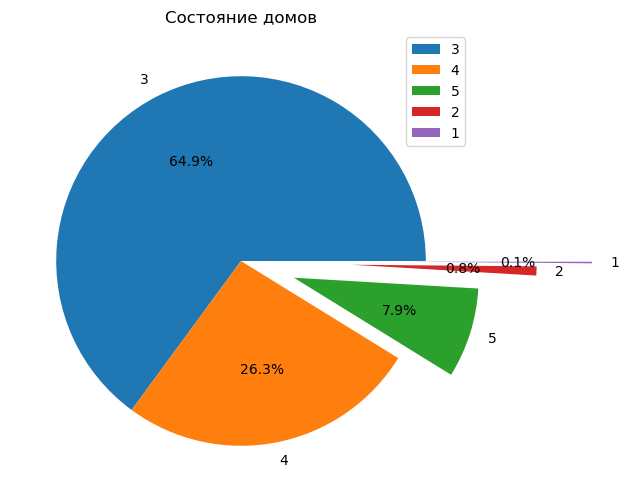

In [51]:
plt.figure(figsize=(6, 6))
expl = [0, 0, 0.3, 0.6, 0.9]
plt.pie(condition.values, autopct='%1.1f%%', labels=condition.index, explode=expl)
plt.title('Состояние домов')
plt.legend(condition.index);

Большая часть домов находится в удовлетворительном состоянии.

## Условие 3: 
### 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

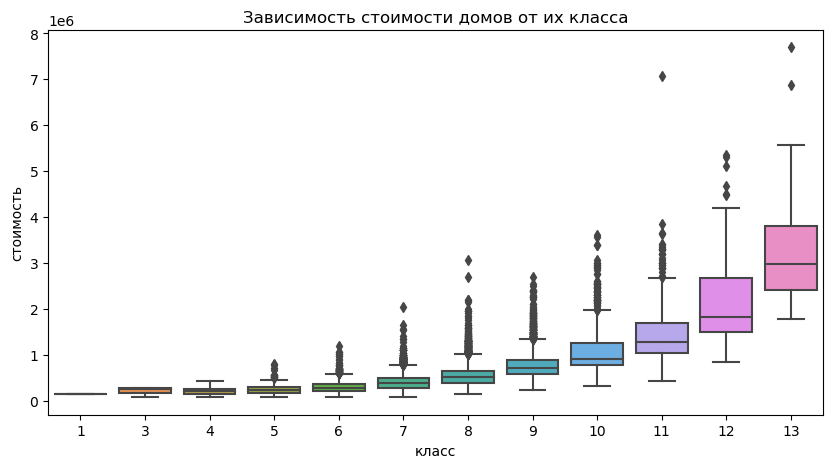

In [58]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["grade"], y=df["price"], whis=1.5)
plt.xlabel("класс")
plt.ylabel("стоимость")
plt.title('Зависимость стоимости домов от их класса');

Видим прямую зависимость стоимость от класса. Чем выше класс, тем выше стоимость. Есть сильно отличающиеся значения по стоимости у 11 и 13 классов.

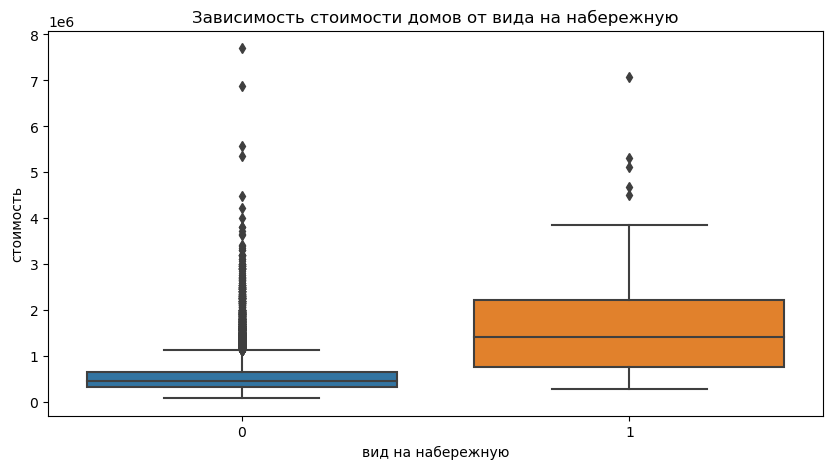

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["waterfront"], y=df["price"], whis=1.5)
plt.xlabel("вид на набережную")
plt.ylabel("стоимость")
plt.title('Зависимость стоимости домов от вида на набережную');

Дома с видом на набережную дороже, однако, есть позиции без вида на набережную, стоимость которых выше.

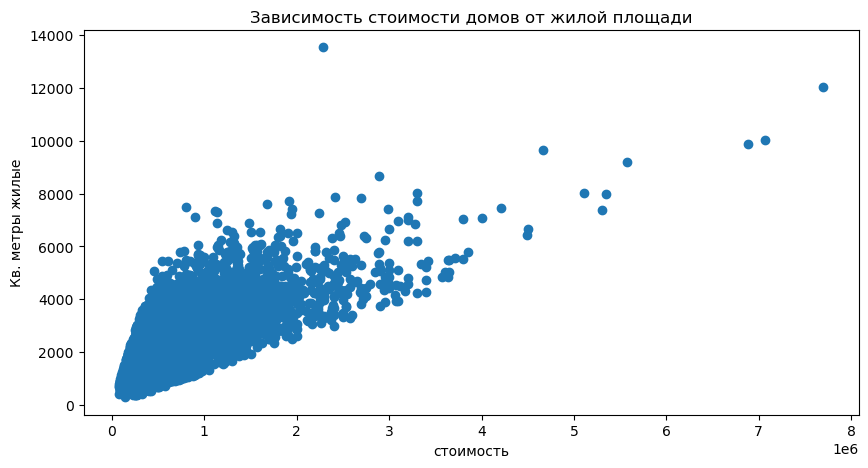

In [61]:
plt.figure(figsize=(10, 5))
plt.scatter(df['price'], df['sqft_living'])
plt.title('Зависимость стоимости домов от жилой площади')
plt.xlabel('стоимость')
plt.ylabel('Кв. метры жилые');

Чем больше жилая площадь, тем дороже стоит дом, и тем меньше количество домов.

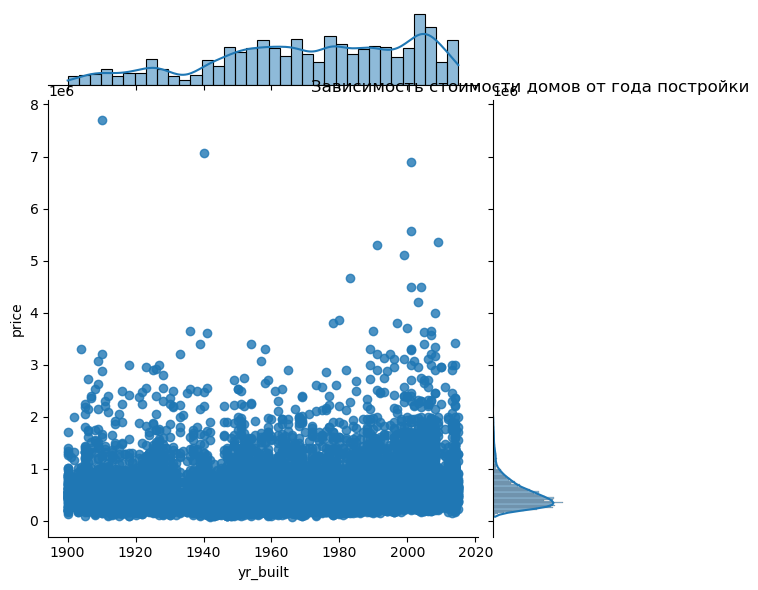

In [65]:
sns.jointplot(x=df['yr_built'], y=df['price'], kind='reg')
plt.xlabel('год постройки')
plt.ylabel('стоимость')
plt.title('Зависимость стоимости домов от года постройки');

Наиболее дорогие дома построены в период с 2000 по 2010 годы.

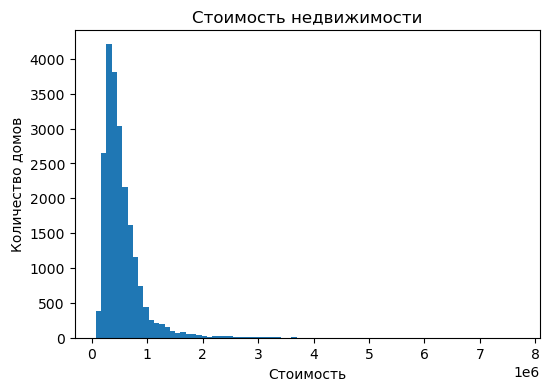

In [66]:
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=80)
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество домов');

Больше всего домов в диапозоне цены от 200 тыс до 1 млн.